<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
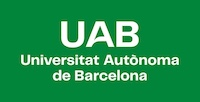
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>University Master's Degree in Computer Vision</b></p>
    <p style="margin: 0; text-align:right;">Reinforcement Learning</p>
    <p style="margin: 0; text-align:right;">Computer Vision Center (CVC)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

# Graph Neural Networks (GNN)

## Example of Graph Convolutional Network (GCN) and Brain Networks

Magnetic Resonance Imaging (MRI) has emerged as a pivotal tool in neuroimaging, particularly in the realm of understanding brain networks and pathologies such as multiple sclerosis (MS). In the context of MS diagnosis and research, MRI offers unparalleled insights into the structural and functional alterations within the brain. One key application lies in the analysis of brain networks, which are intricate systems of interconnected regions responsible for various cognitive and motor functions. By leveraging advanced imaging techniques, researchers can map these networks and discern aberrations associated with MS.

In studies differentiating healthy volunteers from individuals with MS, MRI-based analysis of brain networks becomes instrumental. Through techniques like functional MRI (rs-fMRI) and diffusion tensor imaging (DTI), researchers can examine both functional connectivity and structural integrity within these networks. Functional connectivity measures the temporal correlations of brain activity among spatially distinct regions, while DTI provides information about the integrity of white matter tracts connecting these regions. Disruptions in either of these aspects can serve as biomarkers for MS-related pathology. Moreover, advanced machine learning algorithms trained on MRI data can effectively classify individuals, distinguishing healthy controls from MS patients with a high degree of accuracy. These classifiers capitalize on patterns of connectivity or structural alterations characteristic of MS, aiding in early diagnosis and monitoring of the disease progression.

Overall, MRI-based analysis of brain networks stands as a promising avenue for delineating between healthy individuals and those afflicted by MS. By unraveling the complexities of neural connectivity and structural integrity, researchers can not only enhance diagnostic accuracy but also gain deeper insights into the underlying mechanisms of MS pathology, ultimately paving the way for more effective therapeutic interventions and personalized treatment strategies.

## 1. Data loading

The first step to solve this problem is, obviously, to load the data in _numpy_ array or _pandas_ dataframe.

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
basepath = "./data"
basepath_FA = os.path.join(basepath, "FA")
basepath_GM = os.path.join(basepath, "GM")
basepath_RS = os.path.join(basepath, "RS")

According to the labels, people in this cohort are classified in four groups:
- **Healthy volunteers** (controls, _mstype = -1_): People without MS.
- **Relapsing remitting MS** (RRMS, _mstype = 0_) is a type of MS where you have relapses (symptoms getting worse) followed by recovery (that's when it's “remitting”). Your disability doesn't get worse between relapses but after each relapse it can end up worse than before.
- **Secondary progressive MS** (SPMS, _mstype = 1_) follows the initial course of relapsing-remitting MS (RRMS). Some people who are diagnosed with RRMS eventually go on to have a secondary progressive course, in which neurologic function worsens over time and disability increases.
- **Primary progressive MS** (PPMS, _mstype = 2_). If you have PPMS, you will experience gradually worsening neurologic symptoms and an accumulation of disability. You will not have relapses, or attacks, early in the disease course.

In [3]:
CT_CONTROL = -1
CT_RRMS = 0
CT_SPMS = 1
CT_PPMS = 2

In [4]:
df = pd.read_csv(os.path.join(basepath, "demographics.csv"))
df

,id,mstype
0,0,1
1,1,2
2,2,0
3,3,0
4,4,0
...,...,...
160,160,-1
161,161,-1
162,162,-1
163,163,-1


In [5]:
target = df["mstype"].values
target

array([ 1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1,  1,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In order to simplify the problem, we group all types of people into:
- **Healthy volunteers** (HV), mstype == -1
- **People with MS** (pwMS), mstype == 0, 1, 2

In [6]:
# Transform target to 0 -> HV; 1 -> MS
target = target + 1
target[target > 1] = 1
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

Check the number of subjects in each category:

In [7]:
np.unique(target, return_counts=True)

(array([0, 1]), array([ 18, 147]))

Create a list with all input filenames, using the ID of each subject.

In [8]:
filenames = ["{:04d}.csv".format(x) for x in df["id"]]
filenames

['0000.csv',
 '0001.csv',
 '0002.csv',
 '0003.csv',
 '0004.csv',
 '0005.csv',
 '0006.csv',
 '0007.csv',
 '0008.csv',
 '0009.csv',
 '0010.csv',
 '0011.csv',
 '0012.csv',
 '0013.csv',
 '0014.csv',
 '0015.csv',
 '0016.csv',
 '0017.csv',
 '0018.csv',
 '0019.csv',
 '0020.csv',
 '0021.csv',
 '0022.csv',
 '0023.csv',
 '0024.csv',
 '0025.csv',
 '0026.csv',
 '0027.csv',
 '0028.csv',
 '0029.csv',
 '0030.csv',
 '0031.csv',
 '0032.csv',
 '0033.csv',
 '0034.csv',
 '0035.csv',
 '0036.csv',
 '0037.csv',
 '0038.csv',
 '0039.csv',
 '0040.csv',
 '0041.csv',
 '0042.csv',
 '0043.csv',
 '0044.csv',
 '0045.csv',
 '0046.csv',
 '0047.csv',
 '0048.csv',
 '0049.csv',
 '0050.csv',
 '0051.csv',
 '0052.csv',
 '0053.csv',
 '0054.csv',
 '0055.csv',
 '0056.csv',
 '0057.csv',
 '0058.csv',
 '0059.csv',
 '0060.csv',
 '0061.csv',
 '0062.csv',
 '0063.csv',
 '0064.csv',
 '0065.csv',
 '0066.csv',
 '0067.csv',
 '0068.csv',
 '0069.csv',
 '0070.csv',
 '0071.csv',
 '0072.csv',
 '0073.csv',
 '0074.csv',
 '0075.csv',
 '0076.csv',

The following lines of code will create a **4D _numpy_ array** (`data`) to store the whole dataset:
- The shape of the array should be: _(num_subjects, num_nodes, num_nodes, num_matrices)_

where:
- "num_subjects" is 165,
- "nun_nodes" is 76 (parcellation scheme)
- "num_matrices" is 3 (DTI, GM and rs-fMRI)

In [9]:
data = np.zeros(shape=(len(filenames), 76, 76, 3))

for i, filename in enumerate(filenames):
    df = pd.read_csv(os.path.join(basepath_FA, filename), header=None)
    data[i,:,:,0] = df.values
    
    df = pd.read_csv(os.path.join(basepath_GM, filename), header=None)
    data[i,:,:,1] = df.values
    
    df = pd.read_csv(os.path.join(basepath_RS, filename), header=None)
    data[i,:,:,2] = df.values

print(data.shape)

(165, 76, 76, 3)


Check quantiles and % of pwMS

In [10]:
print("QUANTILES")
for q in np.linspace(0, 1, 11):
    print("{:.2f} -> {:.4f}".format(q, np.quantile(data[:, :, :, :], q)))

QUANTILES
0.00 -> 0.0000
0.10 -> 0.0000
0.20 -> 0.0122
0.30 -> 0.0305
0.40 -> 0.0615
0.50 -> 0.1170
0.60 -> 0.2123
0.70 -> 0.3241
0.80 -> 0.4037
0.90 -> 0.4767
1.00 -> 1.0000


In [11]:
prop = np.where(target == 1)[0].shape[0] / target.shape[0]
print("% of pwMS: {:.4f}".format(prop))

% of pwMS: 0.8909


## 2. Creating the data structures from adjacency matrices

The `array_to_graph` function creates a [Data](https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.data.Data.html) structure from the DTI, GM and rs-fMRI adjacency matrices for each subject in the dataset.

The **input** parameter `data` should be an `np.array` of shape (76, 76, 3), where each adjacency matrix is stored at _(:,:,i)_.

The **output** is `Data` object that contains a pseudo-graph, since edges from every layer are collapsed into this pseudo-graph. Thus, it is an extremely dense graph (probably, all possible edges exist in these graphs!).

In [12]:
import torch
from torch_geometric.data import Data

def array_to_graph(data, y, th=0.0):
    num_nodes = data.shape[0]
    node_dim = 1
    
    edge_index = []
    edge_weight = []
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                if data[i, j, 0] >= th:
                    edge_index.append([i, j])
                    edge_weight.append(data[i, j, 0])
                
                if data[i, j, 1] >= th:
                    edge_index.append([i, j])
                    edge_weight.append(data[i, j, 1])
                
                if data[i, j, 2] >= th:
                    edge_index.append([i, j])
                    edge_weight.append(data[i, j, 2])
        
    y = torch.tensor([int(y)], dtype=torch.long)
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    x = torch.tensor(np.ones(shape=(num_nodes, node_dim)), dtype=torch.float)
    edge_weight = torch.tensor(edge_weight, dtype=torch.float)
    
    data = Data(x=x, edge_index=edge_index.t().contiguous(), edge_weight=edge_weight, y=y)
    
    return data

## 3. Defining the Graph Convolutional Network (GCN)

The `GCN` class defines:
1. The class constructor
2. The `forward` method defines the computation performed at every call.

In [13]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_max_pool

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(1, 128)
        self.conv2 = GCNConv(128, 128)
        self.conv3 = GCNConv(128, 128)
        self.conv4 = GCNConv(128, 128)
        self.conv5 = GCNConv(128, 128)
        self.lin1 = torch.nn.Linear(128, 64)
        self.lin2 = torch.nn.Linear(64, 16)
        self.lin3 = torch.nn.Linear(16, 2)

    def forward(self, data):
        x, edge_index, edge_weight, batch = data.x, data.edge_index, data.edge_weight, data.batch
        
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv3(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv4(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv5(x, edge_index, edge_weight)
        x = F.relu(x)
        x = global_max_pool(x, batch)
        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)
        x = self.lin3(x)

        return x

In this example, we use the CPU to perform the training (it will last for 5–10 minutes).

In [14]:
device = torch.device('cpu')

## 4. Training loop

This is the main training loop, where:
1. We define the $k$-fold cross-validation (`StratifiedKFold`)
2. For each fold:
  - Create the model, optimizer, and loss function.
  - Load the train dataset in `DataLoader` and define the batches.
  - Execute the forward and backward steps
3. Load the test dataset in `DataLoader` and define the batches.
4. Test the model and compute the performance metrics.

In [15]:
from torch_geometric.loader import DataLoader
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

skf = StratifiedKFold(n_splits=10)

NUM_EPOCHS = 20
preds = np.zeros(data.shape[0])
fold = 0

for train_index, test_index in skf.split(data, target):
    fold += 1
    print("Fold: {}".format(fold))

    # split dataset
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    prop_train = np.where(y_train == 1)[0].shape[0] / y_train.shape[0]
    prop_test = np.where(y_test == 1)[0].shape[0] / y_test.shape[0]
    print("Train set size     : {}".format(X_train.shape))
    print("Test set size      : {}".format(X_test.shape))
    print("Train set % of pwMS: {:.4f} ({})".format(prop_train, y_train.sum()))
    print("Test set % of pwMS : {:.4f} ({})".format(prop_test, y_test.sum()))

    # list of Data structures (one for each subject)
    train_graphs = []
    for i in range(X_train.shape[0]):
        g = array_to_graph(X_train[i], y_train[i])
        train_graphs.append(g)
        
    test_graphs = []
    for i in range(X_test.shape[0]):
        g = array_to_graph(X_test[i], y_test[i])
        test_graphs.append(g)

    # create the model
    model = GCN()
    model = model.to(device)
    # optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # loss function
    loss_fn = torch.nn.CrossEntropyLoss()

    # train function
    def train():
        model.train()
        
        train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)

        loss_all = 0
        for batch in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            output = model(batch)
            label = batch.y
            label = F.one_hot(label, num_classes=2)
            label = label.type(torch.FloatTensor)
            label = label.to(device)
            loss = loss_fn(output, label)
            loss.backward()
            loss_all += batch.num_graphs * loss.item()
            optimizer.step()

        return loss_all / len(train_graphs)

    # train for N epochs
    for epoch in range(NUM_EPOCHS):
        loss_value = train()
        print("Train loss at epoch {}: {:.4f}".format(epoch + 1, loss_value))

    # test phase 
    test_loader = DataLoader(test_graphs, batch_size=len(test_graphs), shuffle=False)
    
    for batch in test_loader:
        batch = batch.to(device)
        test_preds = F.softmax(model(batch), dim=1).detach().numpy()
    
    test_preds = test_preds[:, 1]
    preds[test_index] = test_preds
    
    auc_roc = roc_auc_score(y_test, test_preds)
    print("Test AUC: {:.2f}".format(auc_roc))

Fold: 1
Train set size     : (148, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (132)
Test set % of pwMS : 0.8824 (15)
Train loss at epoch 1: 0.6091
Train loss at epoch 2: 0.5753
Train loss at epoch 3: 0.4934
Train loss at epoch 4: 0.3669
Train loss at epoch 5: 0.3951
Train loss at epoch 6: 0.3692
Train loss at epoch 7: 0.3423
Train loss at epoch 8: 0.3559
Train loss at epoch 9: 0.3532
Train loss at epoch 10: 0.3416
Train loss at epoch 11: 0.3418
Train loss at epoch 12: 0.3393
Train loss at epoch 13: 0.3398
Train loss at epoch 14: 0.3425
Train loss at epoch 15: 0.3411
Train loss at epoch 16: 0.3436
Train loss at epoch 17: 0.3431
Train loss at epoch 18: 0.3393
Train loss at epoch 19: 0.3416
Train loss at epoch 20: 0.3423
Test AUC: 0.87
Fold: 2
Train set size     : (148, 76, 76, 3)
Test set size      : (17, 76, 76, 3)
Train set % of pwMS: 0.8919 (132)
Test set % of pwMS : 0.8824 (15)
Train loss at epoch 1: 0.6907
Train loss at epoch 2: 0.6563
Train loss at 

Finally, we compute the **AUC-ROC**, **AUC-PR** and **accuracy** metrics to test the performance of the model.

In [16]:
auc_roc = roc_auc_score(target, preds)
auc_pr = average_precision_score(target, preds)
    
best_acc = 0
best_th = 0
for th in preds:
    acc = accuracy_score(target, (preds >= th).astype(int))
    if acc >= best_acc:
        best_acc = acc
        best_th = th
        
print("")
prop = np.where(target == 1)[0].shape[0] / target.shape[0]
print("% of pwMS: {:.4f}".format(prop))
print("AUC ROC  : {:.4f}".format(auc_roc))
print("AUC PR   : {:.4f}".format(auc_pr))
print("ACC      : {:.4f}".format(best_acc))


% of pwMS: 0.8909
AUC ROC  : 0.5729
AUC PR   : 0.9292
ACC      : 0.8909


## 5. Results

We plot the **ROC Curve** and **Precision Recall Curve** to analyse the performance of the model.

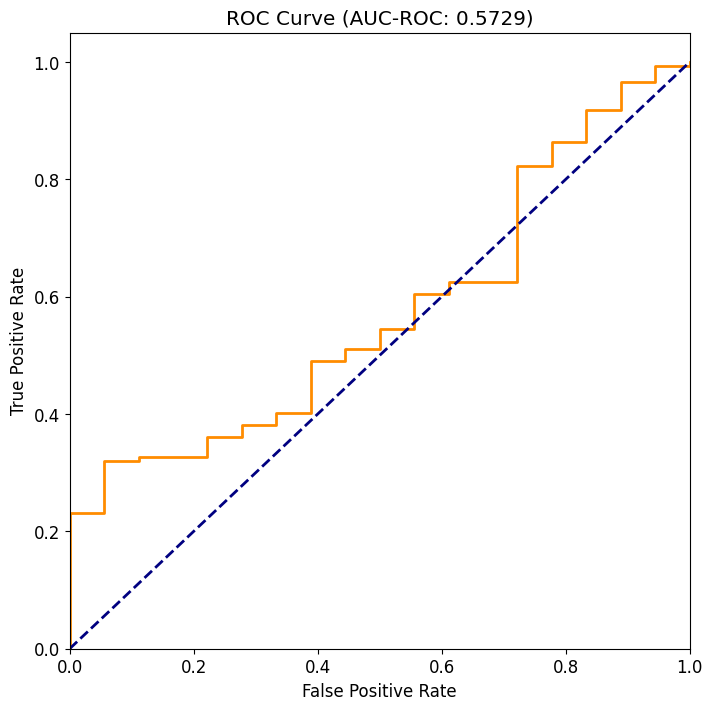

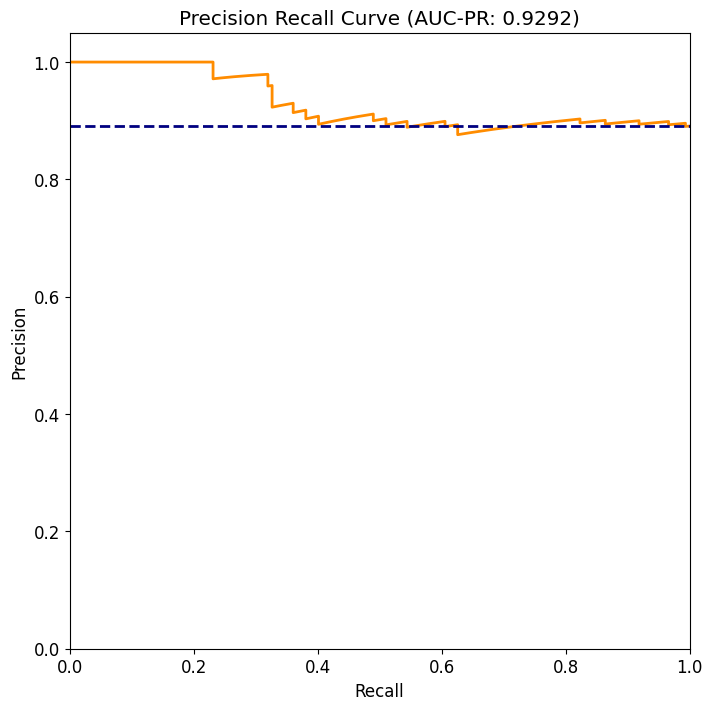

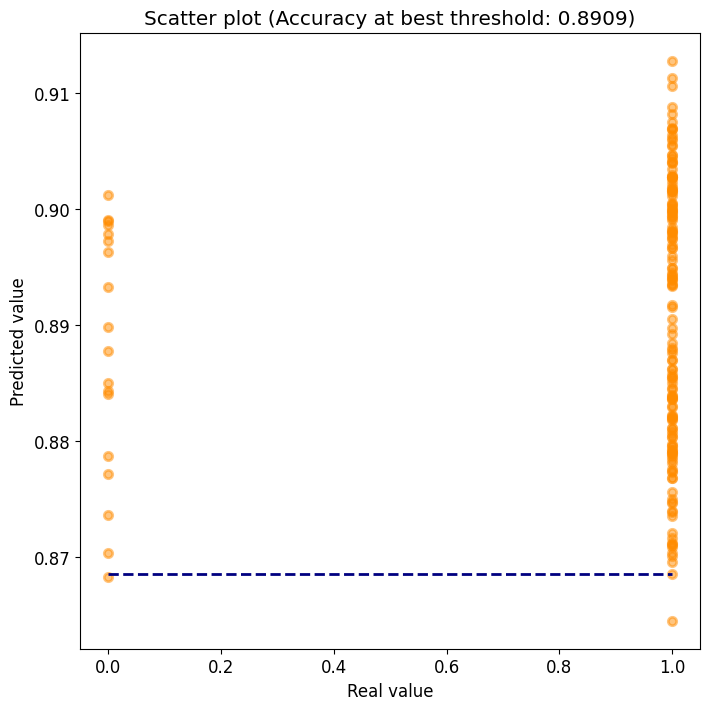

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 12


# compute AUC-ROC and ROC curve
auc_roc = roc_auc_score(target, preds)
fpr, tpr, ths = roc_curve(target, preds)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color="darkorange", lw=lw)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC-ROC: {:.4f})".format(auc_roc))
plt.show()

# Compute AUC-PR
auc_pr = average_precision_score(target, preds)
prec, recall, ths = precision_recall_curve(target, preds)

plt.figure()
lw = 2
plt.plot(recall, prec, color="darkorange", lw=lw)
plt.plot([0, 1], [prop, prop], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve (AUC-PR: {:.4f})".format(auc_pr))
plt.show()

# Compute ACC and threshold
best_acc = 0
best_th = 0
for th in ths:
    acc = accuracy_score(target, (preds >= th).astype(int))
    if acc >= best_acc:
        best_acc = acc
        best_th = th

plt.figure()
plt.scatter(target, preds, alpha=0.5, color="darkorange", lw=lw)
plt.plot([0, 1], [best_th, best_th], color='navy', lw=lw, linestyle='--')
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Scatter plot (Accuracy at best threshold: {:.4f})".format(best_acc))
plt.show()